In [5]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

This notebook looks at the performance of the thermal model over a long period of time, to see how long it takes to get rid of initial conditions for different soil layers.

First load in model results.

In [8]:
# load in the modelling results
# results_folder = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\val_gt1")

runid = 'val_gt14'

fname_gt = runid + "_ground_temperature_timeseries.csv"

# df_model = pd.read_csv(os.path.join(results_folder, fname), parse_dates=['time'])
df_gt = pd.read_csv(fname_gt, parse_dates=['time'])

# Lets add some columns to convert to Celcius
colnames = ['temp_0m[K]', 'temp_0.5m[K]', 'temp_1.0m[K]', 'temp_2.0m[K]', 'temp_2.95m[K]']

for colname in colnames:
    
    df_gt[f'{colname[:-3]}[C]'] = df_gt[colname] - 273.15

df_gt.head()

,Unnamed: 0,time,air_temp[K],temp_0m[K],temp_0.5m[K],temp_1.0m[K],temp_2.0m[K],temp_2.95m[K],total_heat_flux[W/m2],long_wave_radiation_flux[W/m2],solar_radiation_flux[W/m2],latent_heat_flux[W/m2],convective_heat_flux[W/m2],temp_0m[C],temp_0.5m[C],temp_1.0m[C],temp_2.0m[C],temp_2.95m[C]
0,0,2011-01-01,247.379488,257.768955,261.342485,261.676972,259.359955,259.359955,0.000000,0.000000,0.0,0.000000,0.000000,-15.381045,-11.807515,-11.473028,-13.790045,-13.790045
1,1,2011-01-01,247.379488,252.234936,261.332707,261.676950,259.376524,259.359955,-524.801096,-13.164846,0.0,-7.025107,-504.611143,-20.915064,-11.817293,-11.473050,-13.773476,-13.790045
2,2,2011-01-01,247.560030,250.144318,261.309699,261.676691,259.392473,259.359955,-283.754389,-12.339870,0.0,-6.964844,-264.449675,-23.005682,-11.840301,-11.473309,-13.757527,-13.790045
3,3,2011-01-01,247.865404,249.466217,261.279646,261.675838,259.407423,259.359955,-173.702146,-8.263931,0.0,-6.950936,-158.487279,-23.683783,-11.870354,-11.474162,-13.742577,-13.790045
4,4,2011-01-01,248.032535,249.244654,261.245728,261.674085,259.421342,259.359955,-130.829499,-9.039967,0.0,-6.844316,-114.945216,-23.905346,-11.904272,-11.475915,-13.728658,-13.790045


In [83]:
print(df_gt.time)

0       2011-01-01 00:00:00
1       2011-01-01 00:00:00
2       2011-01-01 00:00:00
3       2011-01-01 00:00:00
4       2011-01-01 00:00:00
                ...        
87595   2011-12-31 23:00:00
87596   2011-12-31 23:00:00
87597   2011-12-31 23:00:00
87598   2011-12-31 23:00:00
87599   2011-12-31 23:00:00
Name: time, Length: 87600, dtype: datetime64[ns]


Load in data.

In [22]:
# load in Erikson data
df_erikson = pd.read_csv(
    os.path.join(parent, Path(r"database\raw_datasets\erikson\Groundtemperatu\BTI_2011TimeSeriesData_GroundTemperature.csv")),
    )

# parse dates
df_erikson['time'] = pd.to_datetime(df_erikson[["year", "month", "day", "hour", "minute"]])

# only keep data from site BL01, BL02, BL03, BL04 (these are the ones on the center bottom dataset)
site_ids = ['BL01', 'BL02', 'BL03', 'BL04']
df_erikson = df_erikson[df_erikson['SiteID'].isin(site_ids)]

# lets have a look
display(df_erikson.head())
display(df_erikson.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 07:00:00
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 08:00:00
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 09:00:00
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 10:00:00
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,2011-07-08 11:00:00


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,time
7878,BL04,HOBO,-143.77947,70.084211,2011,9,28,15,0,-0.5,NaN,NaN,-0.5,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 15:00:00
7879,BL04,HOBO,-143.77947,70.084211,2011,9,28,16,0,-0.5,NaN,NaN,-0.4,NaN,-0.5,-0.5,NaN,NaN,NaN,2011-09-28 16:00:00
7880,BL04,HOBO,-143.77947,70.084211,2011,9,28,17,0,-0.4,NaN,NaN,-0.3,NaN,-0.4,-0.4,NaN,NaN,NaN,2011-09-28 17:00:00
7881,BL04,HOBO,-143.77947,70.084211,2011,9,28,18,0,-0.2,NaN,NaN,-0.1,NaN,-0.1,-0.2,NaN,NaN,NaN,2011-09-28 18:00:00
7882,BL04,HOBO,-143.77947,70.084211,2011,9,28,19,0,0.9,NaN,NaN,1.5,NaN,1.5,1.2,NaN,NaN,NaN,2011-09-28 19:00:00


Choose study site.

In [67]:
# Let's for now stick with only BL01
df_erikson = df_erikson[df_erikson['SiteID'].isin(['BL01'])]

df_erikson.head()
print(df_erikson.columns)

Index(['SiteID', 'Instrument', 'Longitude', 'Latitude', 'year', 'month', 'day',
       'hour', 'minute', 'Tair', 'T10cm', 'T15cm', 'T30cm', 'T50cm', 'T60cm',
       'T90cm', 'T100cm', 'T200cm', 'T295cm', 'time'],
      dtype='object')


In [68]:
erikson_columns = ["T50cm", "T100cm", "T200cm", "T295cm"]

Let's plot all model results in one large plot.

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_40092\1653359371.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


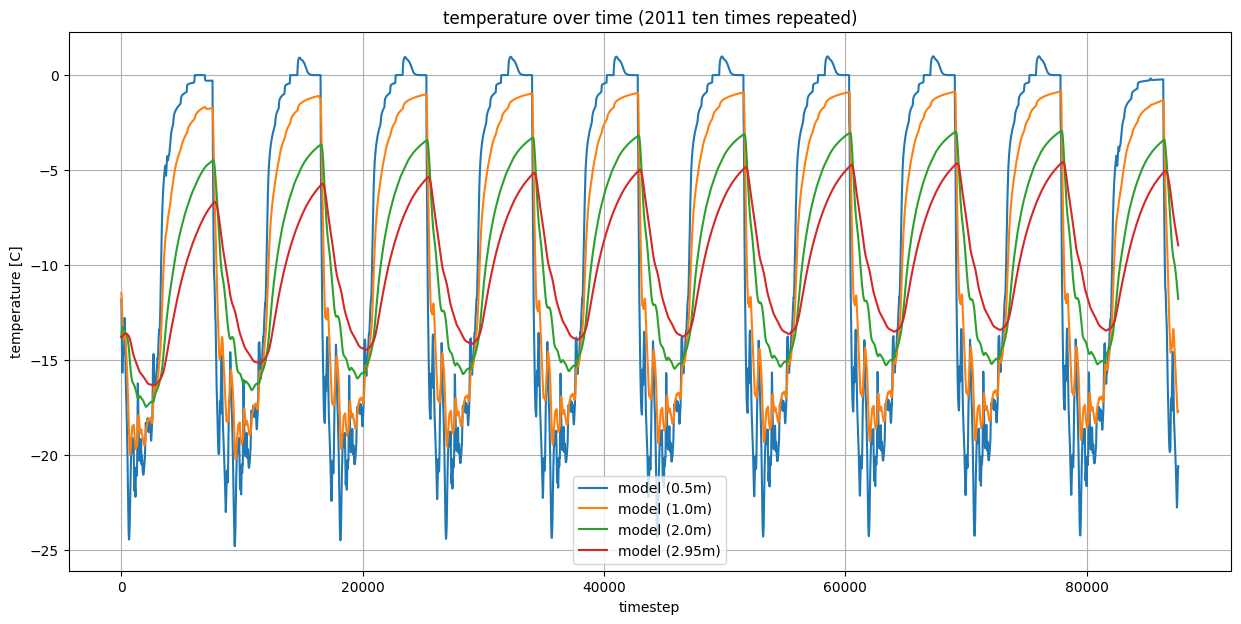

In [69]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(df_gt.index, df_gt['temp_0.5m[C]'].values, label='model (0.5m)')
ax.plot(df_gt.index, df_gt['temp_1.0m[C]'].values, label='model (1.0m)')
ax.plot(df_gt.index, df_gt['temp_2.0m[C]'].values, label='model (2.0m)')
ax.plot(df_gt.index, df_gt['temp_2.95m[C]'].values, label='model (2.95m)')

ax.grid()
ax.legend()

ax.set_title("temperature over time (2011 ten times repeated)")
ax.set_ylabel('temperature [C]')
ax.set_xlabel('timestep')

fig.show()

Let's define a function that converts datetime to hour of year, and adds a number corresponding to the number of the iteration.

In [73]:
def time_to_index(date_array, iteration=0):
    
    # print(pd.to_datetime(df_erikson.time).dt.dayofyear.shape)
    # print(pd.to_datetime(df_erikson.time).dt.hour.shape)
    
    return (pd.to_datetime(df_erikson.time).dt.dayofyear * 24 + pd.to_datetime(df_erikson.time).dt.hour).values + iteration * 8760
    
(time_to_index(df_erikson, 9)).shape

(1940,)

And now each one individually, each year layered over eachother

In [74]:
N = len(df_gt)
years = np.arange(10)

N_year = int(N / len(years))

model_temp_050 = df_gt['temp_0.5m[C]'].values.reshape((len(years), N_year))
model_temp_100 = df_gt['temp_1.0m[C]'].values.reshape((len(years), N_year))
model_temp_200 = df_gt['temp_2.0m[C]'].values.reshape((len(years), N_year))
model_temp_295 = df_gt['temp_2.95m[C]'].values.reshape((len(years), N_year))

print(model_temp_050.shape)

(10, 8760)


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_40092\1818593750.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


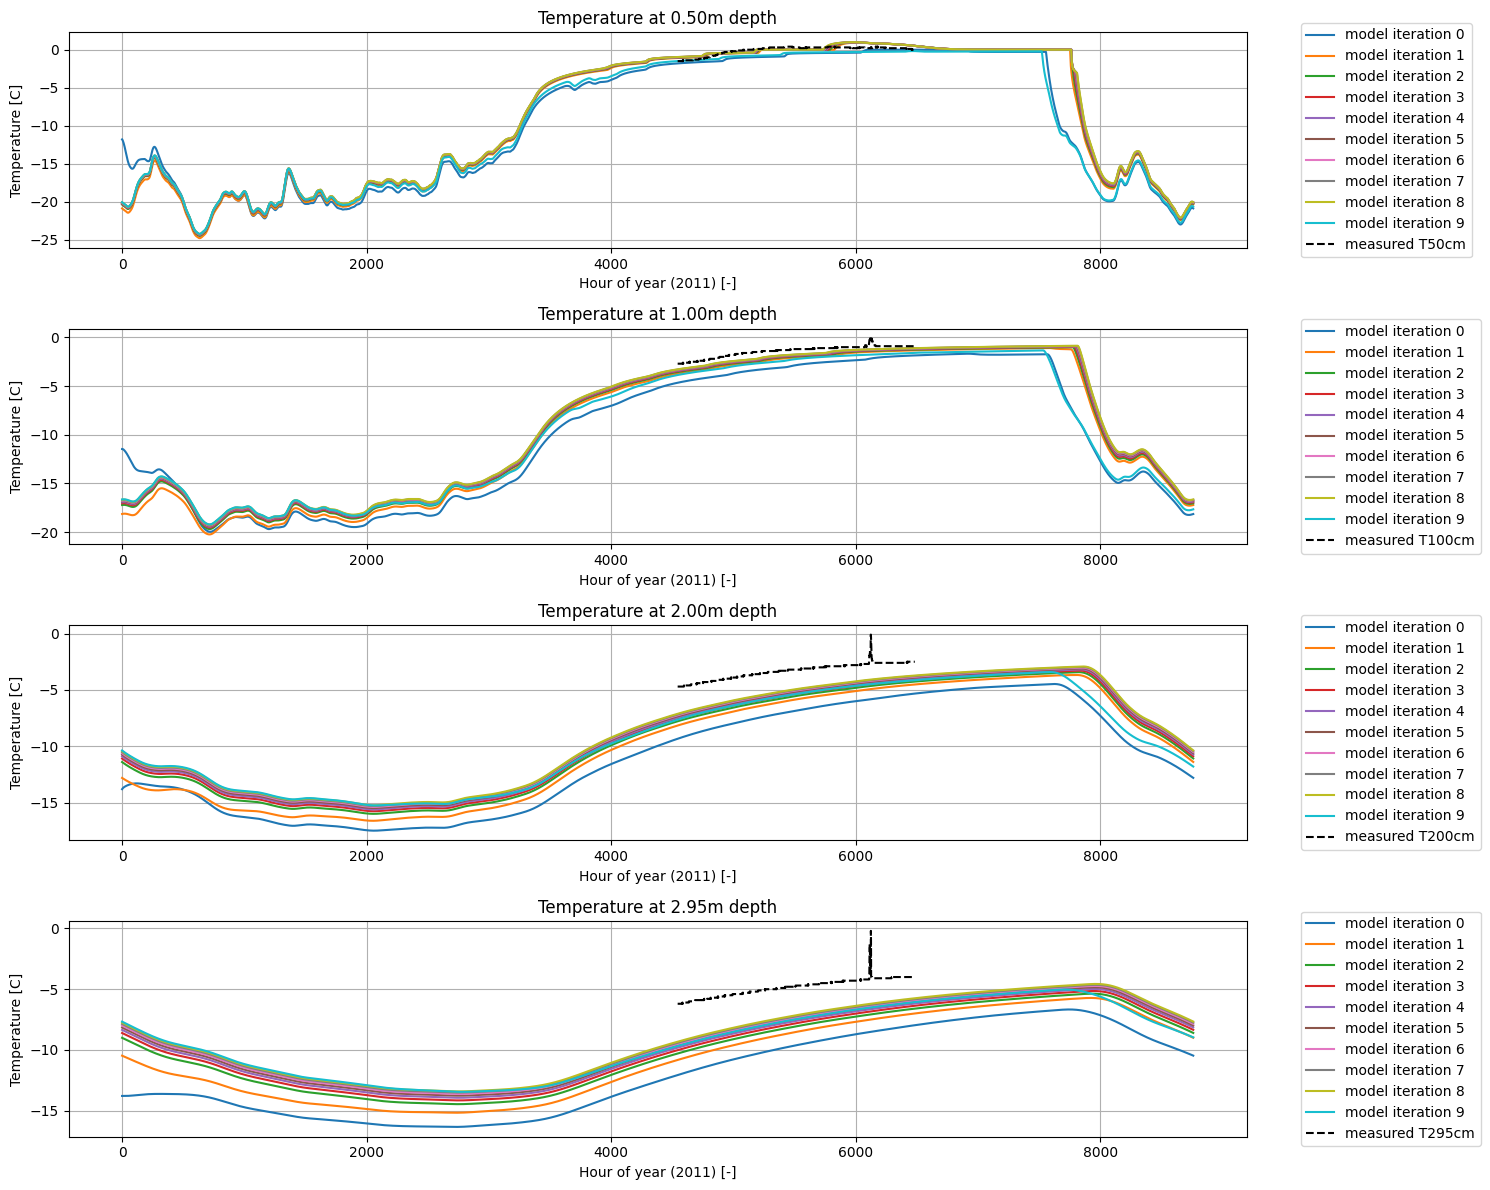

In [79]:
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

# loop through different depths
for i, model_temp in enumerate([model_temp_050, model_temp_100, model_temp_200, model_temp_295]):
    
    # loop through different years
    for it, row in enumerate(model_temp):
        
        axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}')
        # axs[i].plot(np.arange(N_year), model_temp[it,:], label=f'model iteration {it}', alpha=0.5)

    # also plot measured data
    col = erikson_columns[i]
    axs[i].plot(time_to_index(df_erikson.time), df_erikson[col], "k--", label=f"measured {col}")
    
    # and give the plot some attributes
    axs[i].grid()
    axs[i].legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    axs[i].set_xlabel('Hour of year (2011) [-]')
    axs[i].set_ylabel('Temperature [C]')
    axs[i].set_title(f'Temperature at {[0.5, 1.0, 2.0, 2.95][i]:.2f}m depth')
    
        
fig.tight_layout()
fig.show()

Text(0.5, 1.0, 'Surface temperature over time (2011 ten times repeated)')

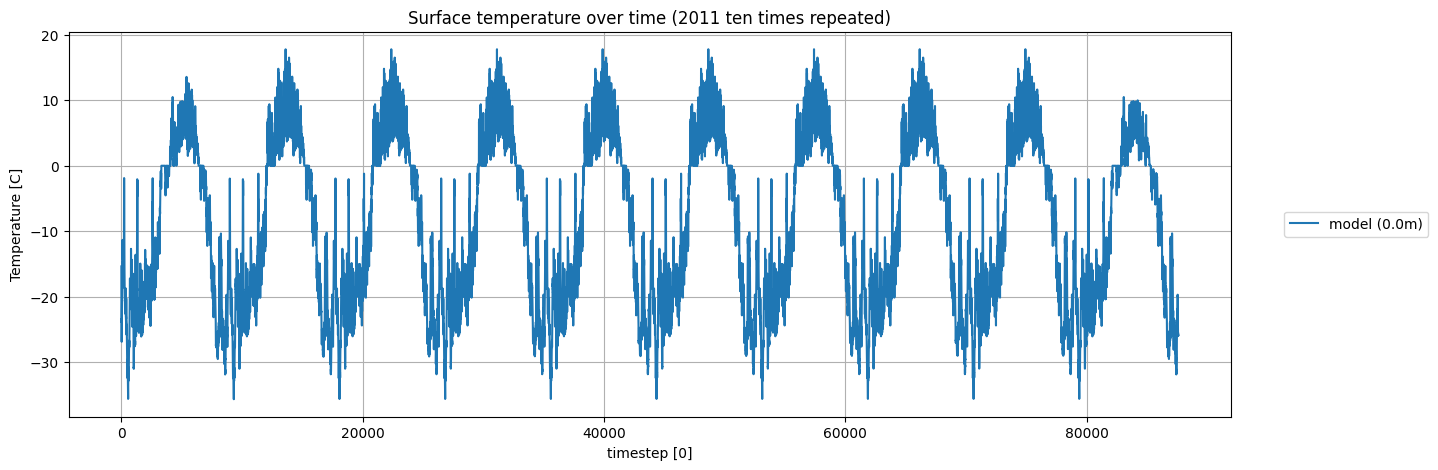

In [82]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df_gt.index, df_gt['temp_0m[C]'], label="model (0.0m)")

ax.grid()
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
ax.set_xlabel('timestep [0]')
ax.set_ylabel('Temperature [C]')
ax.set_title("Surface temperature over time (2011 ten times repeated)")

